In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/paysim1/PS_20174392719_1491204439457_log.csv


Dataset shape: (6362620, 11)

=== Data Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB

=== Missing Values ===
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

=== Transaction Type Distribution ===
type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         414

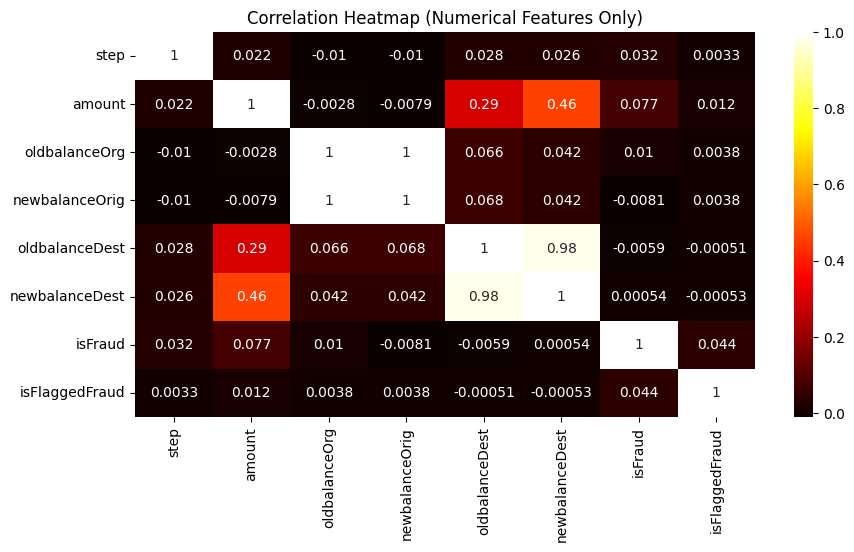

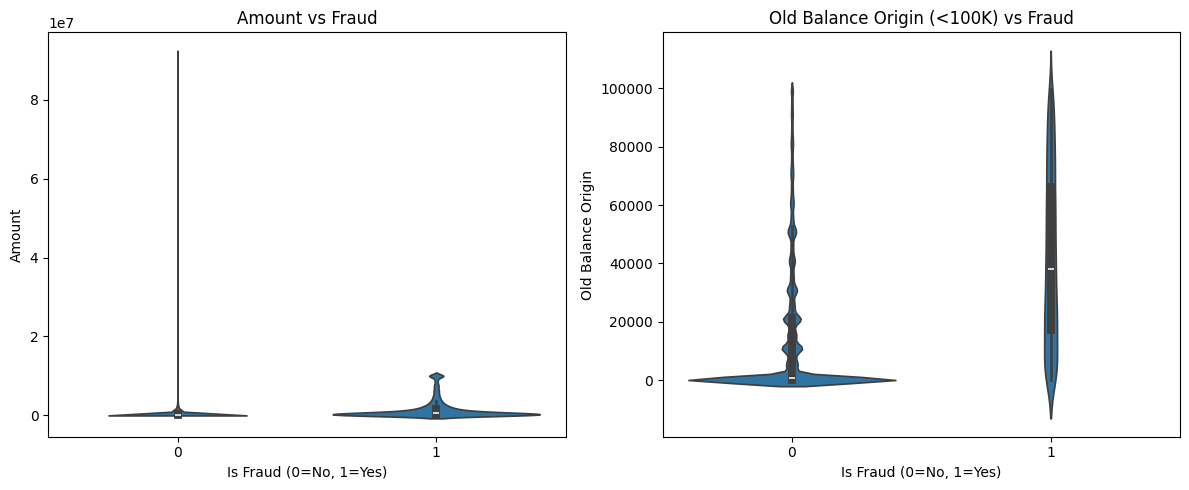

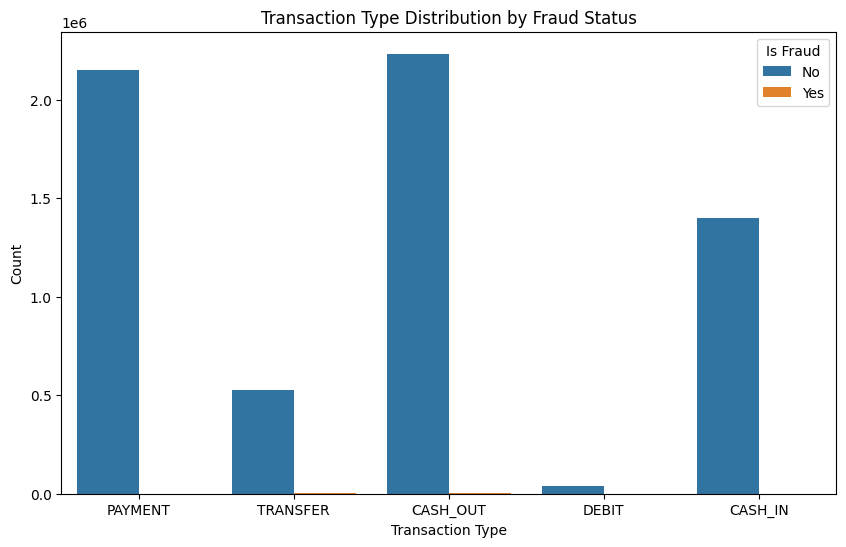

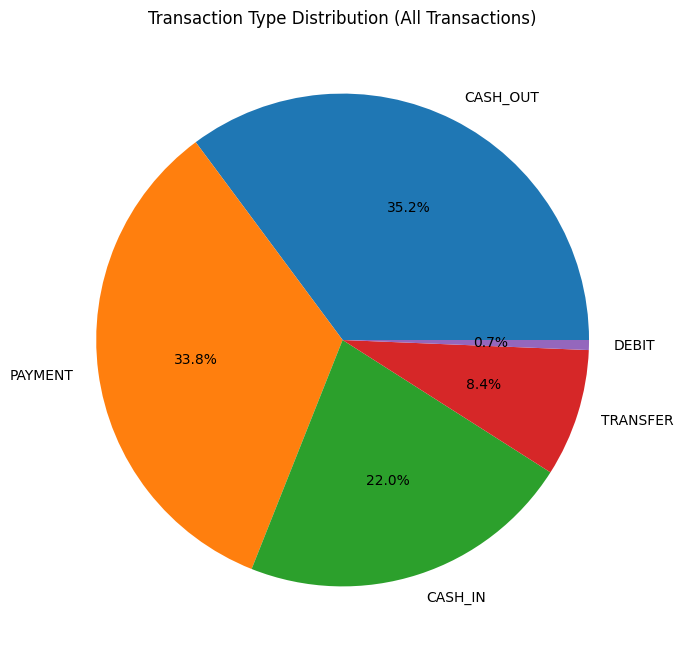

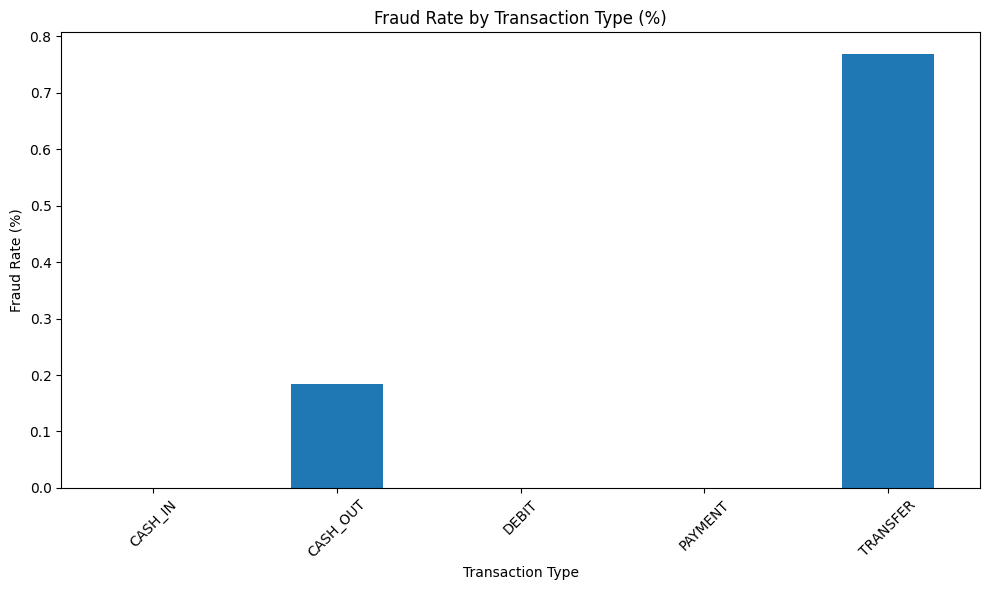


=== Selected Features ===
X shape: (6362620, 8)
Feature names: ['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'isFlaggedFraud']

=== Class Distribution ===
Before SMOTE - Class 0: 6354407, Class 1: 8213
Fraud rate: 0.13%

=== After SMOTE ===
Class 0: 6354407, Class 1: 6354407
Now balanced!

=== Train-Test Split ===
Train shape: (10167051, 8)
Test shape: (2541763, 8)

LOGISTIC REGRESSION

=== Logistic Regression Evaluation ===
Accuracy: 0.9315
Precision: 0.9485
Recall: 0.9125
F1-Score: 0.9302
ROC-AUC: 0.9827

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93   1270882
           1       0.95      0.91      0.93   1270881

    accuracy                           0.93   2541763
   macro avg       0.93      0.93      0.93   2541763
weighted avg       0.93      0.93      0.93   2541763



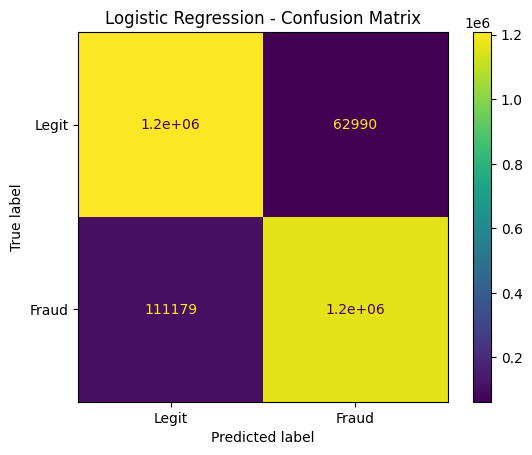

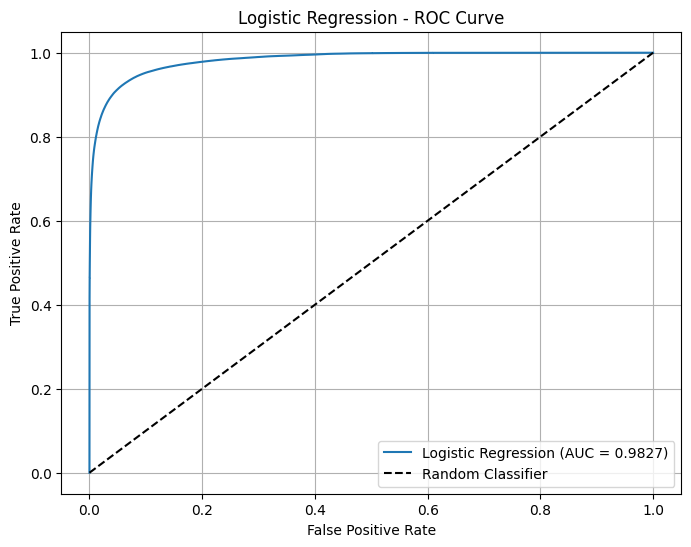


XGBOOST CLASSIFIER

=== XGBoost Evaluation ===
Accuracy: 0.9952
Precision: 0.9944
Recall: 0.9960
F1-Score: 0.9952
ROC-AUC: 0.9999

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1270882
           1       0.99      1.00      1.00   1270881

    accuracy                           1.00   2541763
   macro avg       1.00      1.00      1.00   2541763
weighted avg       1.00      1.00      1.00   2541763



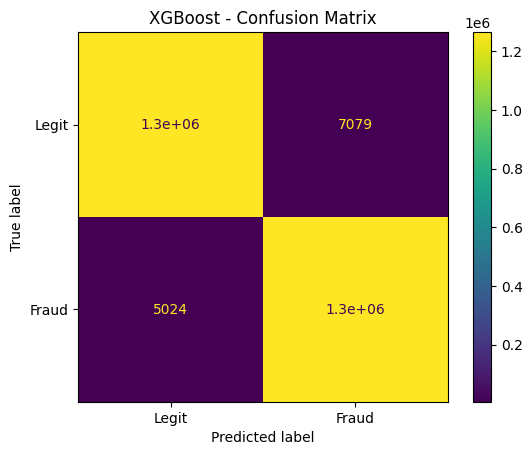

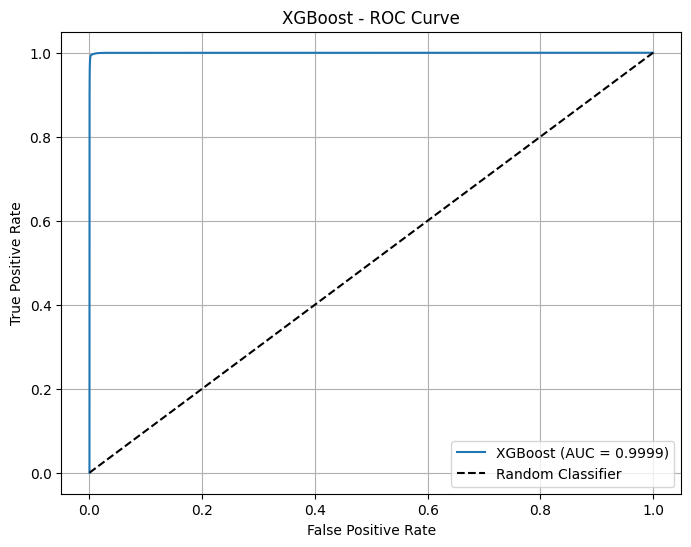

<Figure size 1000x600 with 0 Axes>

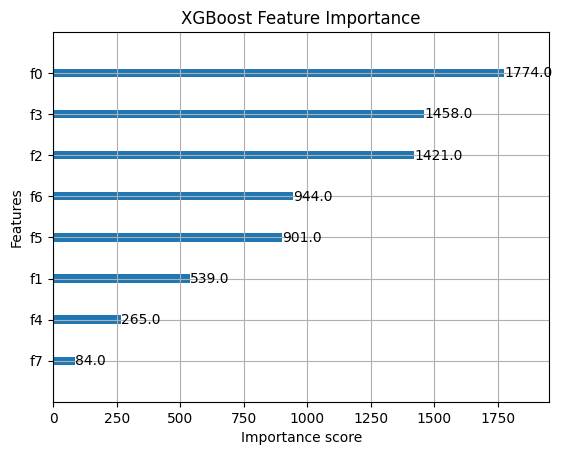


DECISION TREE CLASSIFIER

=== Decision Tree Evaluation ===
Accuracy: 0.9874
Precision: 0.9806
Recall: 0.9944
F1-Score: 0.9874
ROC-AUC: 0.9954

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99   1270882
           1       0.98      0.99      0.99   1270881

    accuracy                           0.99   2541763
   macro avg       0.99      0.99      0.99   2541763
weighted avg       0.99      0.99      0.99   2541763



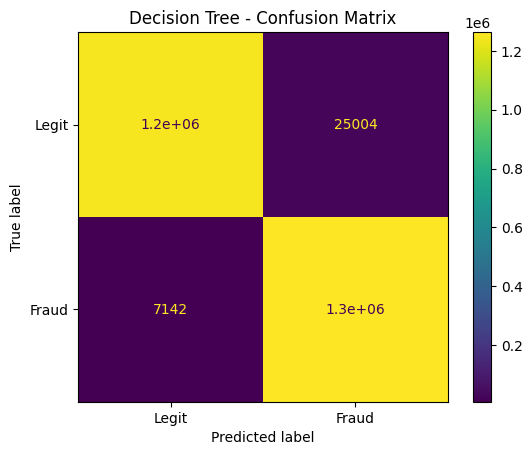

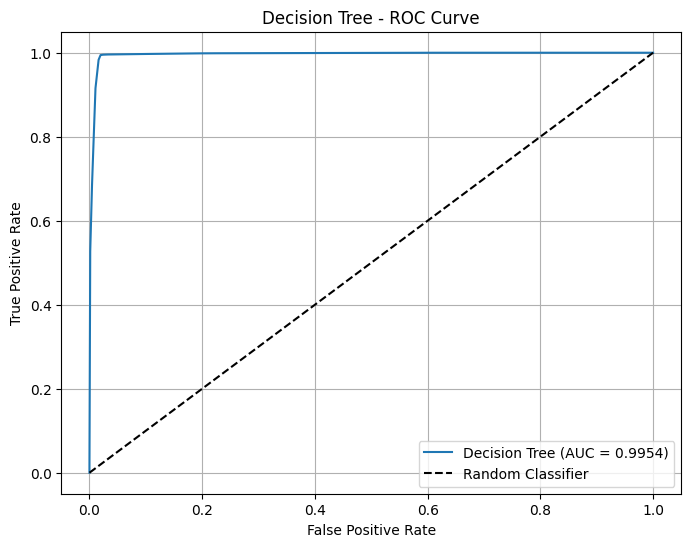


RANDOM FOREST CLASSIFIER

=== Random Forest Evaluation ===
Accuracy: 0.9741
Precision: 0.9658
Recall: 0.9830
F1-Score: 0.9743
ROC-AUC: 0.9980

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97   1270882
           1       0.97      0.98      0.97   1270881

    accuracy                           0.97   2541763
   macro avg       0.97      0.97      0.97   2541763
weighted avg       0.97      0.97      0.97   2541763



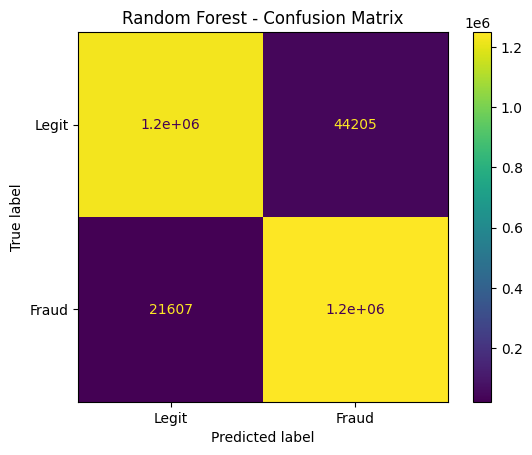

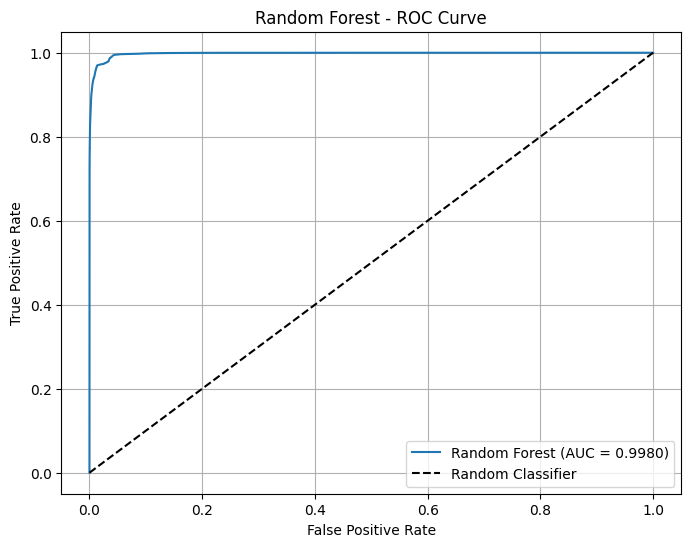


MODEL COMPARISON SUMMARY

Performance Comparison:
              Model  Accuracy  Precision   Recall  F1-Score
Logistic Regression  0.931477   0.948483 0.912518  0.930153
      Decision Tree  0.987353   0.980598 0.994380  0.987441
      Random Forest  0.974108   0.965825 0.982998  0.974336
            XGBoost  0.995238   0.994439 0.996047  0.995242


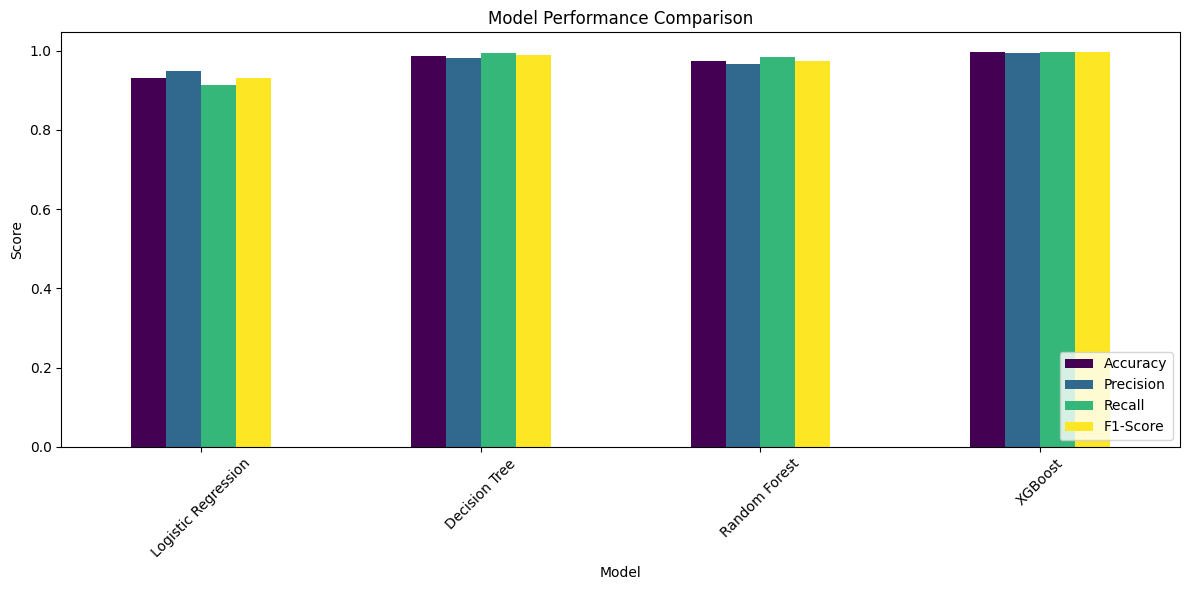


FEATURE IMPORTANCE ANALYSIS

Random Forest Feature Importance:
       Feature  Importance
 oldbalanceOrg    0.306169
newbalanceOrig    0.170598
        amount    0.158671
          type    0.148664
          step    0.078856
      nameDest    0.073348
oldbalanceDest    0.063519
isFlaggedFraud    0.000175


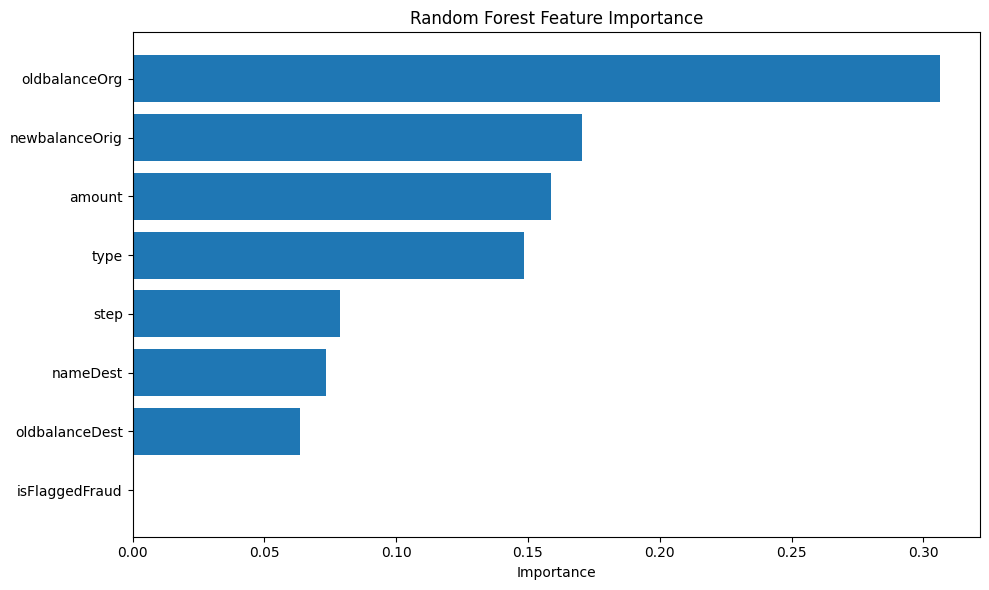


FRAUD DETECTION ANALYSIS SUMMARY
Original dataset size: (6362620, 11)
Number of fraud cases: 8213 (0.13%)
Number of flagged fraud cases: 16
Best model based on F1-Score: XGBoost


In [2]:
# ===== Initial Setup =====
import numpy as np
import pandas as pd
import os

# Load the dataset
df = pd.read_csv('/kaggle/input/paysim1/PS_20174392719_1491204439457_log.csv')
print(f"Dataset shape: {df.shape}")

# ===== Data Exploration =====
print("\n=== Data Info ===")
df.info()

print("\n=== Missing Values ===")
print(df.isna().sum())

print("\n=== Transaction Type Distribution ===")
print(df['type'].value_counts())

print("\n=== Fraud Distribution ===")
print(df['isFraud'].value_counts())

# ===== Visualization Imports =====
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# ===== Visualizations =====
# Heatmap (only for numerical columns)
plt.figure(figsize=(10, 5))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='hot')
plt.title('Correlation Heatmap (Numerical Features Only)')
plt.show()

# Violin plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.violinplot(x=df['isFraud'], y=df['amount'], ax=axes[0])
axes[0].set_title('Amount vs Fraud')
axes[0].set_ylabel('Amount')
axes[0].set_xlabel('Is Fraud (0=No, 1=Yes)')

# Filter for better visualization
filtered_df = df[df['oldbalanceOrg'] < 100000]
sns.violinplot(x=filtered_df['isFraud'], y=filtered_df['oldbalanceOrg'], ax=axes[1])
axes[1].set_title('Old Balance Origin (<100K) vs Fraud')
axes[1].set_ylabel('Old Balance Origin')
axes[1].set_xlabel('Is Fraud (0=No, 1=Yes)')
plt.tight_layout()
plt.show()

# Transaction Type Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type', hue='isFraud')
plt.title('Transaction Type Distribution by Fraud Status')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.legend(title='Is Fraud', labels=['No', 'Yes'])
plt.show()

# Transaction Type Pie Chart (non-fraud only for clarity)
plt.figure(figsize=(10, 8))
type_counts = df['type'].value_counts()
plt.pie(type_counts.values, labels=type_counts.index, autopct='%.1f%%')
plt.title("Transaction Type Distribution (All Transactions)")
plt.show()

# Fraud rate by transaction type
fraud_by_type = df.groupby('type')['isFraud'].mean() * 100
plt.figure(figsize=(10, 6))
fraud_by_type.plot(kind='bar')
plt.title('Fraud Rate by Transaction Type (%)')
plt.xlabel('Transaction Type')
plt.ylabel('Fraud Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ===== Data Preprocessing =====
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Create a copy for preprocessing
df_processed = df.copy()

# Encode categorical variables
encoder = {}
for col in df_processed.select_dtypes('object').columns:
    encoder[col] = LabelEncoder()
    df_processed[col] = encoder[col].fit_transform(df_processed[col])

# Check if 'newbalanceOrig' exists, otherwise use 'newbalanceOrg'
if 'newbalanceOrig' in df_processed.columns:
    balance_col = 'newbalanceOrig'
else:
    balance_col = 'newbalanceOrg'
    print(f"Note: Using 'newbalanceOrg' instead of 'newbalanceOrig'")

# Select features and target
X = df_processed[['step', 'type', 'amount', 'oldbalanceOrg', balance_col, 
                  'nameDest', 'oldbalanceDest', 'isFlaggedFraud']]
y = df_processed['isFraud']

print(f"\n=== Selected Features ===")
print(f"X shape: {X.shape}")
print(f"Feature names: {list(X.columns)}")

# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# ===== Handle Class Imbalance with SMOTE =====
from imblearn.over_sampling import SMOTE

print(f"\n=== Class Distribution ===")
print(f"Before SMOTE - Class 0: {(y == 0).sum()}, Class 1: {(y == 1).sum()}")
print(f"Fraud rate: {(y == 1).mean() * 100:.2f}%")

smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

print(f"\n=== After SMOTE ===")
print(f"Class 0: {(y_resampled == 0).sum()}, Class 1: {(y_resampled == 1).sum()}")
print(f"Now balanced!")

# ===== Train-Test Split =====
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=0, stratify=y_resampled
)

print(f"\n=== Train-Test Split ===")
print(f"Train shape: {X_train.shape}")
print(f"Test shape: {X_test.shape}")

# ===== Model Building and Evaluation =====
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import (classification_report, confusion_matrix, 
                           accuracy_score, f1_score, precision_score, recall_score,
                           roc_auc_score, roc_curve)

def evaluate_model(model, X_test, y_test, model_name="Model"):
    """Helper function to evaluate models"""
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    print(f"\n=== {model_name} Evaluation ===")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
    
    if y_pred_proba is not None:
        print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, 
                                          display_labels=['Legit', 'Fraud'])
    disp.plot()
    plt.title(f'{model_name} - Confusion Matrix')
    plt.show()
    
    # ROC Curve (if probabilities are available)
    if y_pred_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_test, y_pred_proba):.4f})')
        plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{model_name} - ROC Curve')
        plt.legend()
        plt.grid(True)
        plt.show()
    
    return y_pred

# 1. Logistic Regression
print("\n" + "="*50)
print("LOGISTIC REGRESSION")
print("="*50)
log_reg = LogisticRegression(random_state=0, max_iter=1000, class_weight='balanced')
log_reg.fit(X_train, y_train)
evaluate_model(log_reg, X_test, y_test, "Logistic Regression")

# 2. XGBoost
try:
    import xgboost as xgb
    
    print("\n" + "="*50)
    print("XGBOOST CLASSIFIER")
    print("="*50)
    xgb_model = xgb.XGBClassifier(
        max_depth=7,
        learning_rate=0.1,
        n_estimators=100,
        random_state=0,
        eval_metric='logloss',
        scale_pos_weight=len(y_train[y_train==0]) / len(y_train[y_train==1])  # Handle class imbalance
    )
    
    # Train with evaluation set
    eval_set = [(X_train, y_train), (X_test, y_test)]
    xgb_model.fit(X_train, y_train, eval_set=eval_set, verbose=False)
    
    evaluate_model(xgb_model, X_test, y_test, "XGBoost")
    
    # Feature Importance for XGBoost
    plt.figure(figsize=(10, 6))
    xgb.plot_importance(xgb_model, importance_type='weight', max_num_features=10)
    plt.title('XGBoost Feature Importance')
    plt.show()
    
except ImportError:
    print("XGBoost not available. Skipping XGBoost model.")

# 3. Decision Tree
print("\n" + "="*50)
print("DECISION TREE CLASSIFIER")
print("="*50)
dt_model = DecisionTreeClassifier(random_state=0, max_depth=5, class_weight='balanced')
dt_model.fit(X_train, y_train)
evaluate_model(dt_model, X_test, y_test, "Decision Tree")

# 4. Random Forest
print("\n" + "="*50)
print("RANDOM FOREST CLASSIFIER")
print("="*50)
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=7,
    random_state=0,
    class_weight='balanced'
)
rf_model.fit(X_train, y_train)
evaluate_model(rf_model, X_test, y_test, "Random Forest")

# ===== Model Comparison =====
print("\n" + "="*50)
print("MODEL COMPARISON SUMMARY")
print("="*50)

models = {
    'Logistic Regression': log_reg,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
}

# Add XGBoost if available
try:
    import xgboost
    models['XGBoost'] = xgb_model
except:
    pass

results = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results)
print("\nPerformance Comparison:")
print(results_df.to_string(index=False))

# Visual comparison
fig, ax = plt.subplots(figsize=(12, 6))
results_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1-Score']].plot(
    kind='bar', ax=ax, colormap='viridis'
)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# ===== Feature Importance Analysis =====
print("\n" + "="*50)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*50)

# Get feature names
feature_names = list(X.columns)

# Random Forest feature importance
rf_importance = rf_model.feature_importances_
rf_feat_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_importance
}).sort_values('Importance', ascending=False)

print("\nRandom Forest Feature Importance:")
print(rf_feat_importance.to_string(index=False))

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(rf_feat_importance['Feature'], rf_feat_importance['Importance'])
plt.xlabel('Importance')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# ===== Final Summary =====
print("\n" + "="*50)
print("FRAUD DETECTION ANALYSIS SUMMARY")
print("="*50)
print(f"Original dataset size: {df.shape}")
print(f"Number of fraud cases: {df['isFraud'].sum()} ({(df['isFraud'].mean()*100):.2f}%)")
print(f"Number of flagged fraud cases: {df['isFlaggedFraud'].sum()}")
print(f"Best model based on F1-Score: {results_df.loc[results_df['F1-Score'].idxmax(), 'Model']}")
print("="*50)